In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\Vandana Jha\\Documents\\DATA\hearing_test.csv")

In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [8]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [9]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

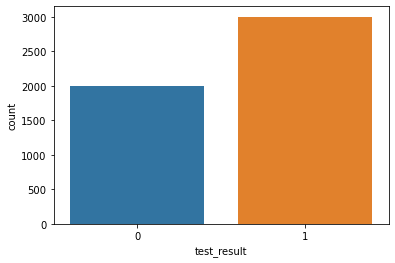

In [10]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

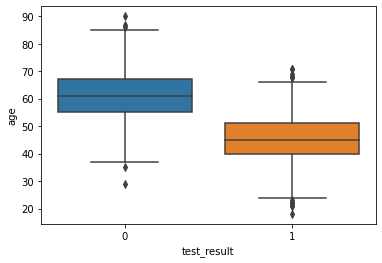

In [11]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

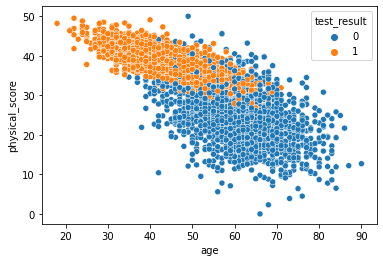

In [12]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

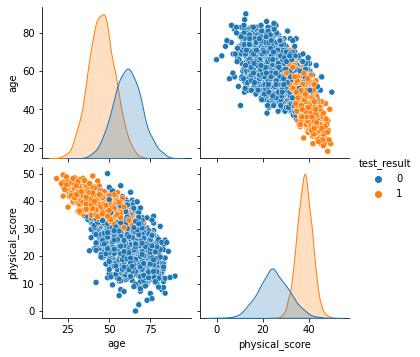

In [13]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

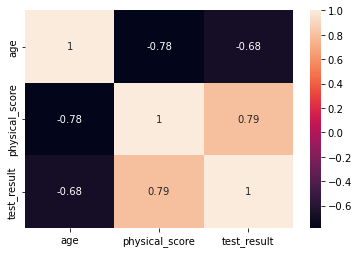

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

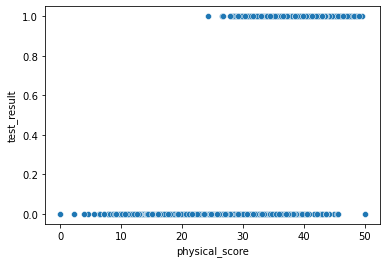

In [15]:
sns.scatterplot(x='physical_score',y='test_result',data=df)

<AxesSubplot:xlabel='age', ylabel='test_result'>

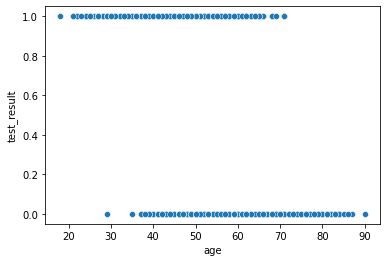

In [16]:
sns.scatterplot(x='age',y='test_result',data=df)

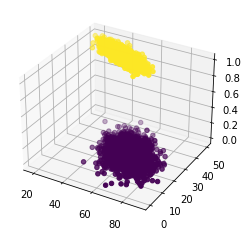

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

In [18]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [26]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [28]:
y_pred = log_model.predict(scaled_X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.93

In [30]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

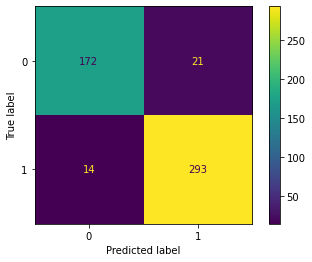

In [31]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

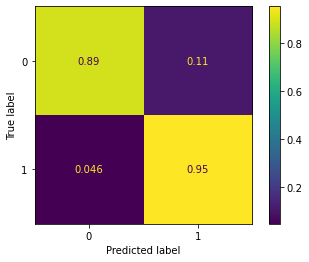

In [32]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [37]:
y_train.iloc[0]

1

In [38]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [39]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1], dtype=int64)

In [40]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

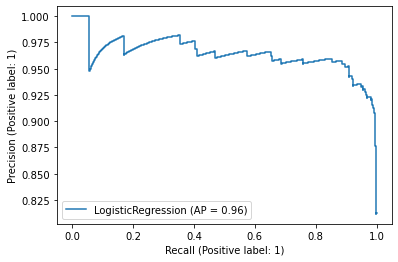

In [41]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

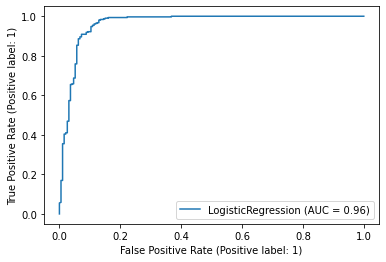

In [42]:
plot_roc_curve(log_model,scaled_X_test,y_test)

MULTICLASS LOGISTIC REGRESSION

In [43]:
df=pd.read_csv("C:\\Users\\Vandana Jha\\Documents\\DATA\\iris.csv")

In [44]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

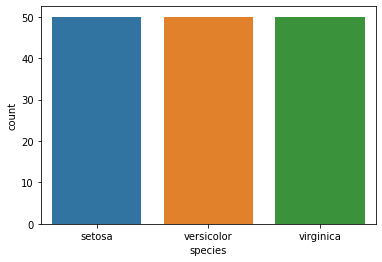

In [47]:
sns.countplot(data=df,x='species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

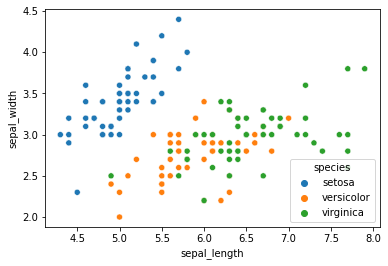

In [48]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

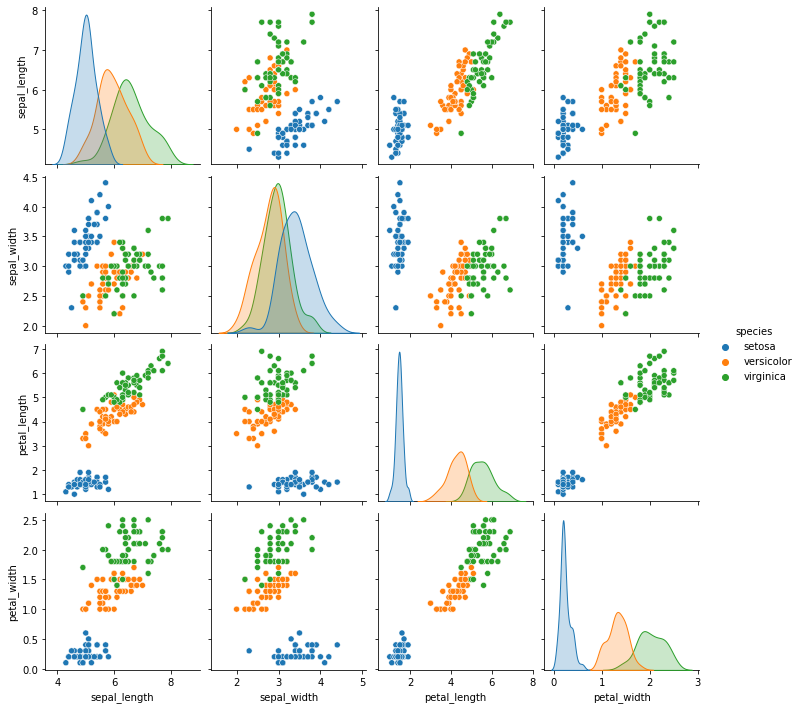

In [49]:
sns.pairplot(df,hue='species')

<AxesSubplot:>

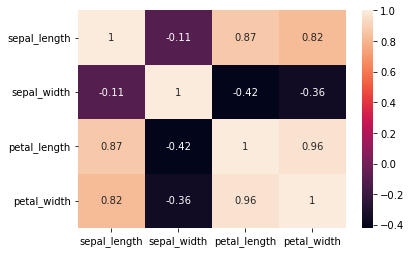

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

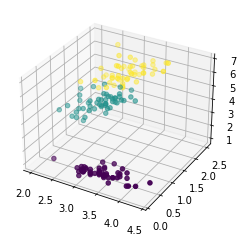

In [52]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

In [53]:
X = df.drop('species',axis=1)
y = df['species']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [55]:
scaler = StandardScaler()

In [56]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

In [57]:
from sklearn.model_selection import GridSearchCV

In [59]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [60]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [61]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [62]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [63]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

In [64]:
y_pred = grid_model.predict(scaled_X_test)

In [65]:
accuracy_score(y_test,y_pred)

0.9736842105263158

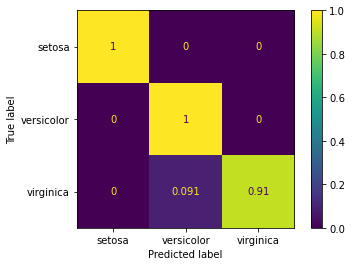

In [66]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [71]:
from sklearn.metrics import roc_curve, auc

In [72]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

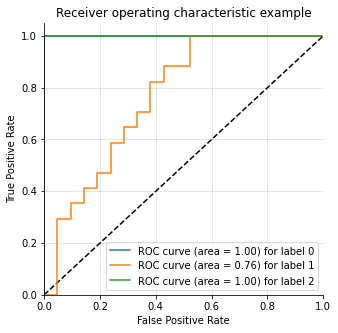

In [73]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(5, 5))